In [68]:
#import libs

import pandas as pd
pd.set_option('display.max_columns', None)

#import libs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = catalog.load('election_databse')
df

2022-06-30 18:27:53,549 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [3]:
df_lisboa = df.loc[df['territoryName'] == 'Lisboa']
df_lisboa.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
213,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PS,0,34.64,36.57,1584,20,20
214,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PPD/PSD,0,29.19,30.82,1335,17,12
215,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,B.E.,0,7.78,8.22,356,4,5
216,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PCP-PEV,0,5.69,6.00,260,3,4
217,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,CDS-PP,0,5.49,5.79,251,3,2


In [4]:
#limpar os dados e verificar se tem algum NaN
nan_df = df_lisboa[df_lisboa.isna().any(axis=1)]
nan_df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates


In [5]:
df_lisboa.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

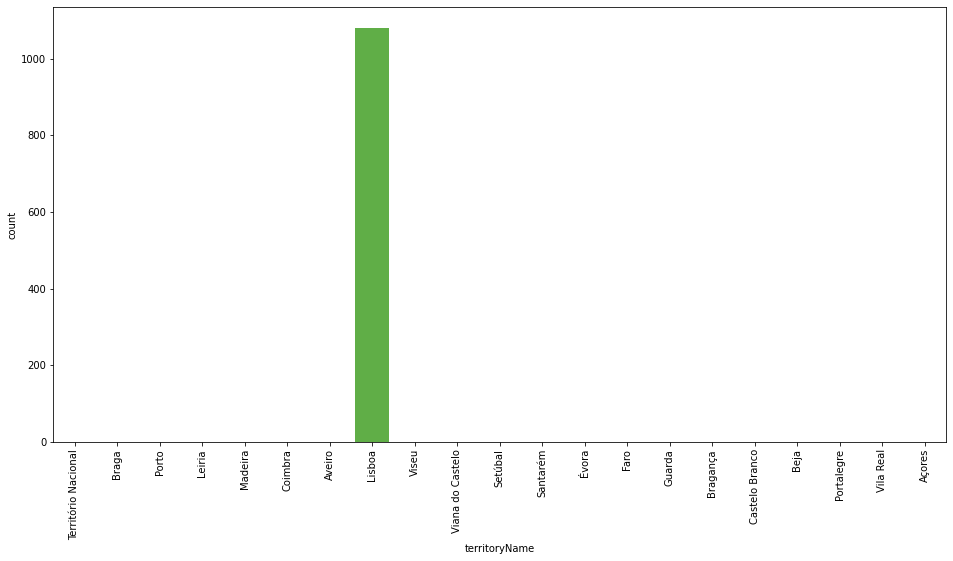

In [6]:
#Avaliando o Nome de territorio
f, ax = plt.subplots(figsize=(16,8))
territory_plot = sns.countplot(x='territoryName', data=df_lisboa, order = df['territoryName'].value_counts().index)
territory_plot.set_xticklabels(territory_plot.get_xticklabels(), rotation=90)
fig = territory_plot.get_figure()
fig.savefig("fig_territory.png") 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


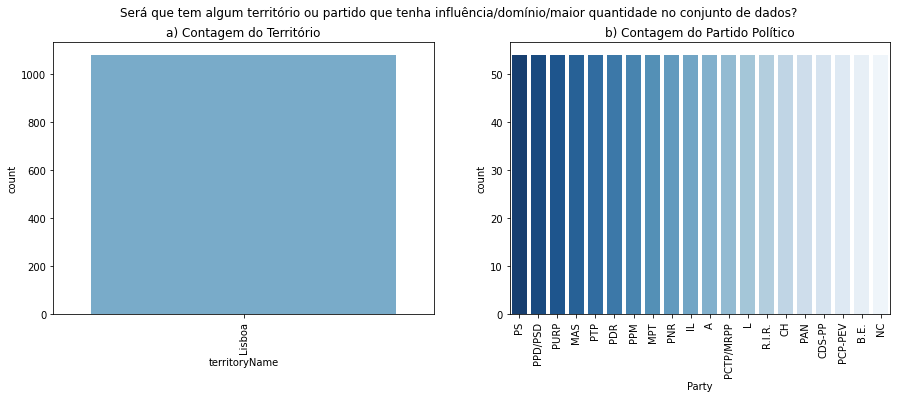

In [7]:
# Qual o territorio e o partido que tem mais frequencia nos dados? 
# Será que tem algum territorio ou partido que tenha dominancia no conjunto de dados? 

fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Será que tem algum território ou partido que tenha influência/domínio/maior quantidade no conjunto de dados?')

axes[0].set_title('a) Contagem do Território')
territory = sns.countplot(df_lisboa['territoryName'], data=df_lisboa, ax=axes[0], order = df_lisboa['territoryName'].value_counts().index, palette = "Blues_r")
axes[0].set_xticklabels(territory.get_xticklabels(), rotation=90)

axes[1].set_title('b) Contagem do Partido Político')
party = sns.countplot(df_lisboa['Party'],data=df_lisboa, ax=axes[1], order = df_lisboa['Party'].value_counts().index, palette = "Blues_r")
axes[1].set_xticklabels(party.get_xticklabels(), rotation=90)

plt.show()

In [8]:
corr_all = df_lisboa.corr()
corr_all
corr_all.style.background_gradient(cmap='Reds')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,0.952592,-0.952592,nan,0.967750,0.973402,-0.883474,0.972068,-0.866133,0.441349,0.970633,0.971714,0.972989,-0.911864,0.971543,-0.843903,0.659509,0.970917,0.971578,0.295401,0.003346,0.000024,0.313488,-0.000000,-0.000000
totalMandates,0.952592,1.000000,-1.000000,nan,0.903611,0.970654,-0.848788,0.973383,-0.709155,0.199243,0.977612,0.977728,0.974153,-0.826060,0.976218,-0.676591,0.439159,0.977606,0.977751,0.310102,0.002946,0.000027,0.315514,-0.000000,-0.000000
availableMandates,-0.952592,-1.000000,1.000000,nan,-0.903611,-0.970654,0.848788,-0.973383,0.709155,-0.199243,-0.977612,-0.977728,-0.974153,0.826060,-0.976218,0.676591,-0.439159,-0.977606,-0.977751,-0.310102,-0.002946,-0.000027,-0.315514,0.000000,0.000000
numParishes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
numParishesApproved,0.967750,0.903611,-0.903611,nan,1.000000,0.974944,-0.925368,0.971703,-0.927045,0.479818,0.966591,0.967159,0.971612,-0.966388,0.968609,-0.909307,0.712862,0.966794,0.967060,0.280212,0.003554,0.000022,0.311954,-0.000000,-0.000000
blankVotes,0.973402,0.970654,-0.970654,nan,0.974944,1.000000,-0.922142,0.999844,-0.829346,0.319479,0.999304,0.999379,0.999867,-0.923622,0.999562,-0.802826,0.569729,0.999319,0.999354,0.301002,0.003335,0.000026,0.322421,-0.000000,-0.000000
blankVotesPercentage,-0.883474,-0.848788,0.848788,nan,-0.925368,-0.922142,1.000000,-0.918008,0.840422,-0.409240,-0.914809,-0.915687,-0.919029,0.974304,-0.915352,0.820745,-0.637236,-0.915035,-0.915565,-0.263211,-0.003495,-0.000025,-0.295369,0.000000,0.000000
nullVotes,0.972068,0.973383,-0.973383,nan,0.971703,0.999844,-0.918008,1.000000,-0.821308,0.307215,0.999747,0.999755,0.999951,-0.917789,0.999906,-0.794225,0.558205,0.999750,0.999744,0.301848,0.003310,0.000026,0.322547,-0.000000,-0.000000
nullVotesPercentage,-0.866133,-0.709155,0.709155,nan,-0.927045,-0.829346,0.840422,-0.821308,1.000000,-0.757625,-0.809935,-0.811659,-0.821683,0.935493,-0.814484,0.998256,-0.914232,-0.810427,-0.811291,-0.219911,-0.003572,-0.000016,-0.261690,0.000000,0.000000
votersPercentage,0.441349,0.199243,-0.199243,nan,0.479818,0.319479,-0.409240,0.307215,-0.757625,1.000000,0.291606,0.295794,0.309379,-0.546247,0.298650,-0.778940,0.954137,0.292539,0.294957,0.061786,0.002325,0.000004,0.095206,0.000000,0.000000


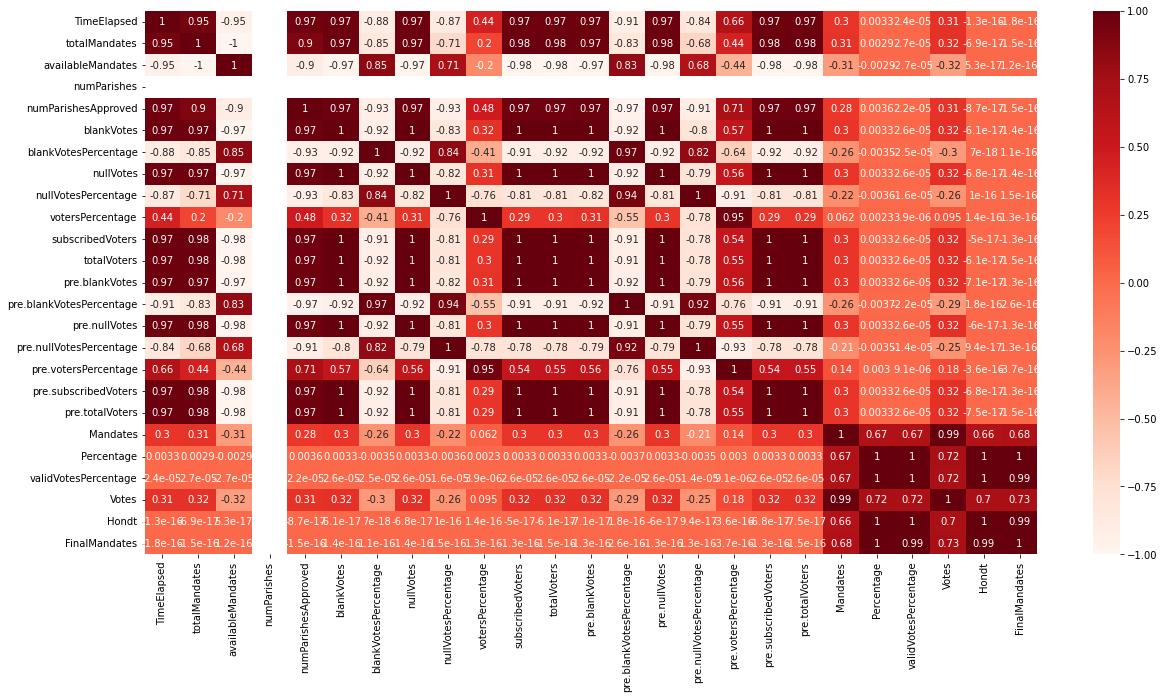

In [9]:
f, ax = plt.subplots(figsize=(20,10))
corr_analysis = sns.heatmap(data=corr_all, 
           annot=True,
           annot_kws=None,
           cmap="Reds")
plt.show()
fig = corr_analysis.get_figure()
fig.savefig("fig_corr_analysis.png") 

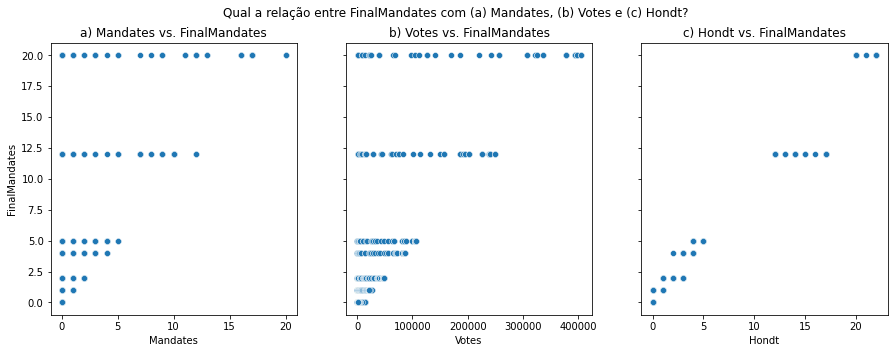

In [10]:
#É observado na no heatmap que o FinalMandates tem alta correlacao com 
#(a) Mandates, (b) Percentage, (c) validVotesPercentage, (d)Votes e (e) Hondt. 
# Qual a relação entre Mandates com o FinalMandates?
#define dimensions of subplots (rows, columns)

fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
FinalMandates = fig.suptitle('Qual a relação entre FinalMandates com (a) Mandates, (b) Votes e (c) Hondt?')
axes[0].set_title('a) Mandates vs. FinalMandates')
sns.scatterplot(ax=axes[0], x=df_lisboa['Mandates'], y=df_lisboa['FinalMandates'])

axes[1].set_title('b) Votes vs. FinalMandates')
sns.scatterplot(ax=axes[1], x=df_lisboa['Votes'], y=df_lisboa['FinalMandates'])

axes[2].set_title('c) Hondt vs. FinalMandates')
sns.scatterplot(ax=axes[2], x=df_lisboa['Hondt'], y=df_lisboa['FinalMandates'])
plt.show()

fig = FinalMandates.get_figure()
fig.savefig("fig_finalmandates.png") 

<AxesSubplot:title={'center':'b) Votes vs. FinalMandates'}, xlabel='validVotesPercentage', ylabel='FinalMandates'>

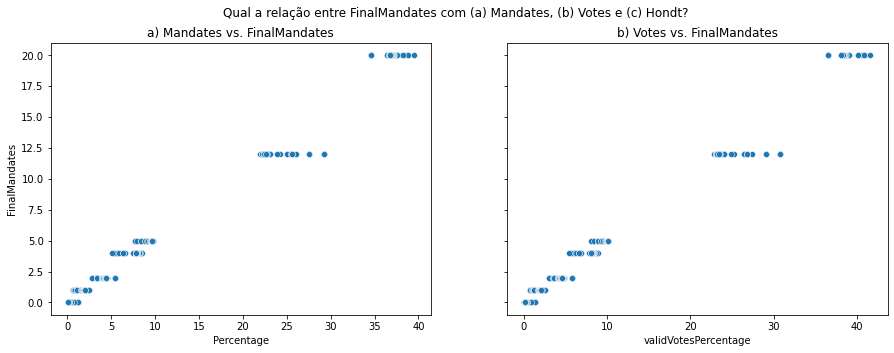

In [11]:
#É observado na no heatmap que o FinalMandates tem alta correlacao com 
#(a) Mandates, (b) Percentage, (c) validVotesPercentage, (d)Votes e (e) Hondt. 
# Qual a relação entre Mandates com o FinalMandates?
#define dimensions of subplots (rows, columns)

fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
FinalMandates = fig.suptitle('Qual a relação entre FinalMandates com (a) Mandates, (b) Votes e (c) Hondt?')
axes[0].set_title('a) Mandates vs. FinalMandates')
sns.scatterplot(ax=axes[0], x=df_lisboa['Percentage'], y=df_lisboa['FinalMandates'])

axes[1].set_title('b) Votes vs. FinalMandates')
sns.scatterplot(ax=axes[1], x=df_lisboa['validVotesPercentage'], y=df_lisboa['FinalMandates'])


In [50]:
#Limpando o dataframe, considerando a correlacao >0,9
df_lisboa = df_lisboa.drop(columns=['territoryName', 'numParishes'])
df_lisboa.shape
df_lisboa.dtypes

time                    int64
totalMandates           int64
numParishesApproved     int64
blankVotes              int64
nullVotes               int64
subscribedVoters        int64
totalVoters             int64
pre.blankVotes          int64
pre.nullVotes           int64
pre.subscribedVoters    int64
pre.totalVoters         int64
Party                   int64
Mandates                int64
Votes                   int64
Hondt                   int64
FinalMandates           int64
dtype: object

In [51]:
df_lisboa['time'] = pd.to_datetime(df_lisboa['time']).astype(int) / 10**9
df_lisboa['time']

0        1.570393e+09
1        1.570393e+09
2        1.570393e+09
3        1.570393e+09
4        1.570393e+09
             ...     
21638    1.570409e+09
21639    1.570409e+09
21640    1.570409e+09
21641    1.570409e+09
21642    1.570409e+09
Name: time, Length: 21643, dtype: float64

In [21]:
df_lisboa.dtypes

TimeElapsed                   int64
time                        float64
totalMandates                 int64
availableMandates             int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
dtype: object

In [52]:
#transformando a coluna Party que é categoria de texto em categorias de numero 

from sklearn.preprocessing import LabelEncoder
label_encoder_party = LabelEncoder()
label_encoder_party
label_encoder_party = label_encoder_party.fit(df_lisboa['Party'])

In [53]:
df_lisboa['Party'] = label_encoder_party.transform(df_lisboa['Party'])

In [54]:
label_encoder_party.inverse_transform(df_lisboa['Party'])

array([17, 15,  1, ...,  8, 18,  5])

In [55]:
df_lisboa.head()

,time,totalMandates,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
0,1.570393e+09,0,1081,9652,8874,752529,386497,8317,8171,813743,428546,17,0,147993,94,106
1,1.570393e+09,0,1081,9652,8874,752529,386497,8317,8171,813743,428546,15,0,128624,81,77
2,1.570393e+09,0,1081,9652,8874,752529,386497,8317,8171,813743,428546,1,0,26307,16,19
3,1.570393e+09,0,1081,9652,8874,752529,386497,8317,8171,813743,428546,2,0,18923,12,5
4,1.570393e+09,0,1081,9652,8874,752529,386497,8317,8171,813743,428546,11,0,17757,11,12


In [56]:
df_lisboa.dtypes

time                    float64
totalMandates             int64
numParishesApproved       int64
blankVotes                int64
nullVotes                 int64
subscribedVoters          int64
totalVoters               int64
pre.blankVotes            int64
pre.nullVotes             int64
pre.subscribedVoters      int64
pre.totalVoters           int64
Party                     int64
Mandates                  int64
Votes                     int64
Hondt                     int64
FinalMandates             int64
dtype: object

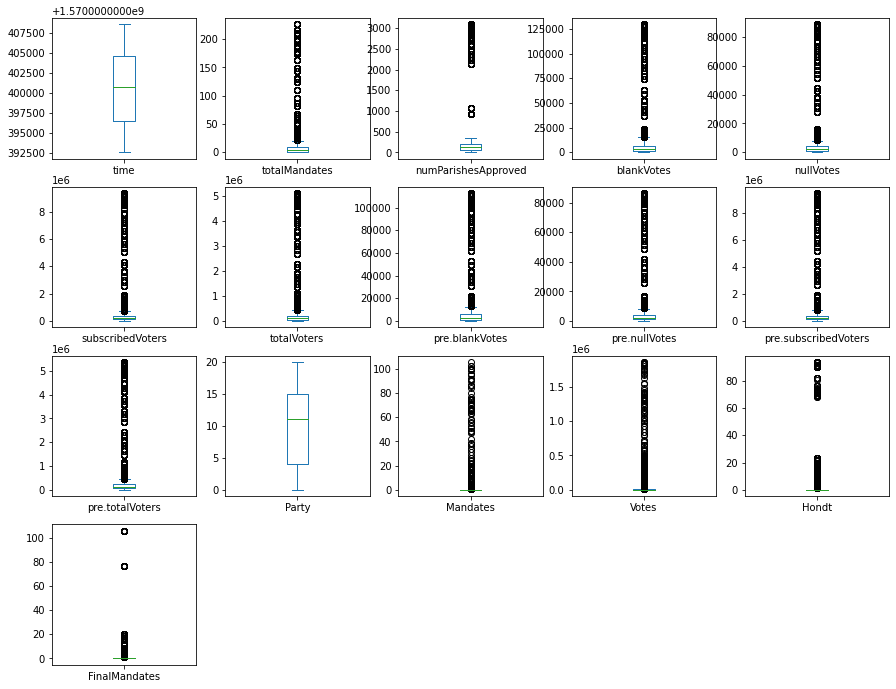

In [57]:
#Now we will check for outliers using boxplot

fig = df_lisboa.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

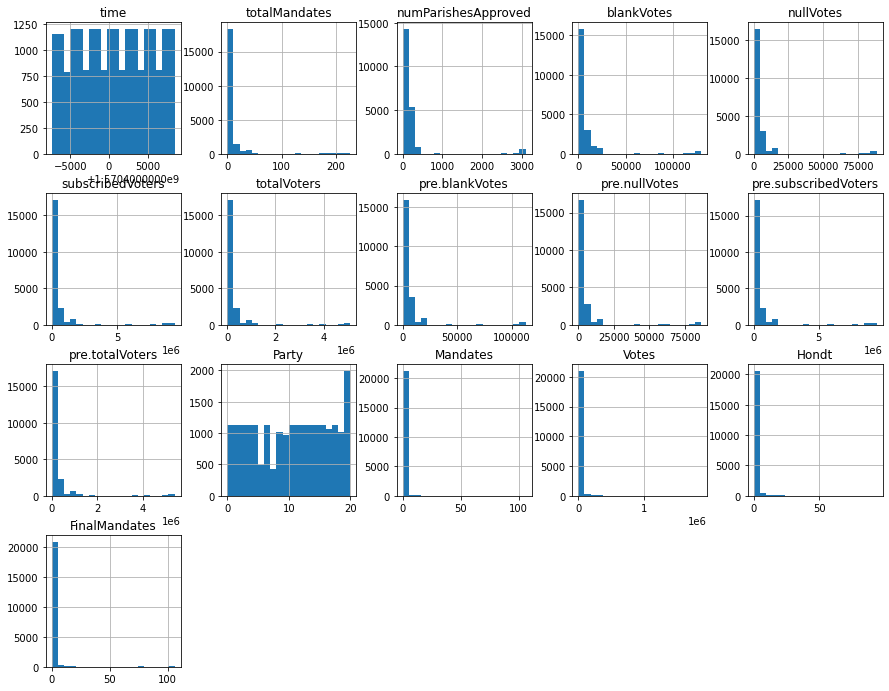

In [58]:
#Now plotting histogram for checking distribution of variables
fig2 = df_lisboa.hist(figsize=(15,15), layout=(5,5), bins=20)

In [60]:
#Removal of Outliers
#Metodo Z-score

#O z-score nos diz o quanto cada valor em nossa 
#distribuição se distancia da média em termos de desvio padrão.

from scipy import stats

z = stats.zscore(df_lisboa)
z

,time,totalMandates,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
0,-1.714632,-0.368680,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,1.126269,-0.127891,1.419284,14.757327,15.259962
1,-1.714632,-0.368680,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,0.799979,-0.127891,1.211248,12.691673,11.040237
2,-1.714632,-0.368680,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,-1.484053,-0.127891,0.112293,2.363404,2.600786
3,-1.714632,-0.368680,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,-1.320908,-0.127891,0.032984,1.727818,0.563677
4,-1.714632,-0.368680,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,0.147398,-0.127891,0.020460,1.568922,1.582231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,1.697993,-0.113202,0.027272,-0.180599,-0.166138,-0.183196,-0.194720,-0.182397,-0.160345,-0.172185,-0.192595,-0.178892,-0.127891,-0.166696,-0.178939,-0.163862
21639,1.697993,-0.113202,0.027272,-0.180599,-0.166138,-0.183196,-0.194720,-0.182397,-0.160345,-0.172185,-0.192595,0.636834,-0.127891,-0.166761,-0.178939,-0.163862
21640,1.697993,-0.113202,0.027272,-0.180599,-0.166138,-0.183196,-0.194720,-0.182397,-0.160345,-0.172185,-0.192595,-0.342037,-0.127891,-0.167513,-0.178939,-0.163862
21641,1.697993,-0.113202,0.027272,-0.180599,-0.166138,-0.183196,-0.194720,-0.182397,-0.160345,-0.172185,-0.192595,1.289414,-0.127891,-0.167695,-0.178939,-0.163862


In [61]:
print(np.where(z<3))
print(df_lisboa.shape)

#para definir um valor limite de outlier é escolhido que geralmente é 3,0. 
#Como 99,7% dos pontos de dados estão entre +/- 3 desvios padrão 
#(usando a abordagem de distribuição de Gauss).
#https://acervolima.com/detecte-e-remova-os-outliers-usando-python/

(array([    0,     0,     0, ..., 21642, 21642, 21642]), array([ 0,  1,  2, ..., 13, 14, 15]))
(21643, 16)


In [64]:
#Assign the value to df_new which are less the threshold value and removing the outliers
filtered_entries= (z < 3).all(axis=1)
df_lisboa_new = df_lisboa[filtered_entries]

In [65]:
print(df_lisboa.shape)
print(df_lisboa_new.shape)
df_lisboa_new.tail()

(21643, 16)
(20598, 16)


,time,totalMandates,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
21638,1.570409e+09,8,277,4995,3700,348061,177647,4235,3632,371931,190712,9,0,332,0,0
21639,1.570409e+09,8,277,4995,3700,348061,177647,4235,3632,371931,190712,14,0,326,0,0
21640,1.570409e+09,8,277,4995,3700,348061,177647,4235,3632,371931,190712,8,0,256,0,0
21641,1.570409e+09,8,277,4995,3700,348061,177647,4235,3632,371931,190712,18,0,239,0,0
21642,1.570409e+09,8,277,4995,3700,348061,177647,4235,3632,371931,190712,5,0,118,0,0


In [66]:
#Assign the value to df_new which are less the threshold value and removing the outliers
df_lisboa_new = df_lisboa[(z<3).all(axis = 1)]
df_lisboa=df_lisboa_new

In [69]:
#MODELO
#SEM FUNCAO

# Create dependent variables
X = df_lisboa.drop(columns=['FinalMandates'])
y = df_lisboa['FinalMandates']

# Slipt data 
X_train, X_test, y_train, y_test = train_test_split(
df_lisboa, y, test_size = 0.3, random_state = 9999, stratify = y
)
    

regression = GradientBoostingRegressor()
regression.fit(X_train, y_train)
    
#Predicts test set 
y_pred = regression.predict(X_test)
    
#Reports Score
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score:',r2_score(y_test,y_pred))



MAE: 2.5777701499494202e-05
MSE: 3.4295893726615974e-09
RMSE: 5.856269608429582e-05
R2 score: 0.9999999989924835


In [70]:
resultado_final = pd.DataFrame({'TestValues': y_test, 'PredictedValues': y_pred})
resultado_final

,TestValues,PredictedValues
11035,0,0.000015
4934,0,0.000015
5609,0,0.000015
3128,0,0.000015
15018,0,0.000015
...,...,...
16488,0,0.000015
12836,1,0.999997
10095,0,0.000015
4279,2,1.999969


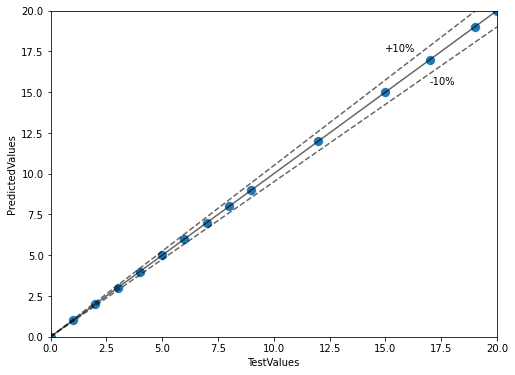

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))

x1=[0,20]
y1=x1
y2=[0,21]
y3=[0,19]
sns.scatterplot(x=resultado_final['TestValues'], y=resultado_final['PredictedValues'], s=100)
sns.lineplot(x=x1, y=y1, color='black', linestyle='-', alpha=0.6)
sns.lineplot(x=x1, y=y2, color='black', linestyle='--', alpha=0.6)
sns.lineplot(x=x1, y=y3, color='black', linestyle='--', alpha=0.6)

ax.text(15, 17.5, "+10%")
ax.text(17, 15.5, "-10%")

plt.xlim(0,20)
plt.ylim(0,20)
plt.show() 

<AxesSubplot:xlabel='TestValues', ylabel='PredictedValues'>

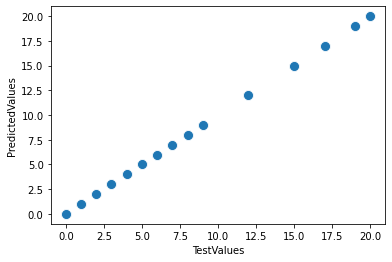

In [73]:
sns.scatterplot(x=resultado_final['TestValues'], y=resultado_final['PredictedValues'], s=100)

